In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

### 1. Load & Clean Users.csv

#### i. Load Data

In [6]:
df = pd.read_csv('data/users.csv', encoding='ISO-8859-1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
df.shape

(12000, 10)

In [8]:
df = df.rename(columns={"object_id": "user_id"})

In [9]:
df.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

#### ii. Convert time to Datetime

In [10]:
#Convert last_session_creation_time to datetime
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'],unit='s')
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [11]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [12]:
#Check Datatypes
df.dtypes

user_id                                int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

#### iii. Wrangle Time Values

In [13]:
df.isnull().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [14]:
null_time = df[df["last_session_creation_time"].isnull()]
null_time.head(3)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0


For the 3,177 users with no last session: I assume this means they were added to the system, but never used the product. I'm going to add a never_visited column that records a 1 for these users.

In [15]:
df['never_visited'] = np.where(df['last_session_creation_time'].isnull(), 1, 0)
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,never_visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


I'll now replace the last_session_creation_time with creation_time for those who have never visited.

In [16]:
df['last_session_creation_time'].fillna(df['creation_time'], inplace=True)
df.head(2)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,never_visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,0


In [17]:
df['invited_by_user_id'].min()

3.0

In [18]:
df['invited_by_user_id'].max()

11999.0

For the 55883 with no invited_by_user_id, I will assume these are organic members.

In [19]:
#Replacing 'Null' with Organic
df['invited_by_user_id'].fillna("Organic", inplace=True)

In [20]:
#Visual Check
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,never_visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0


In [21]:
df.isnull().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
never_visited                 0
dtype: int64

### 2. Load UserEngagement.csv

#### i. Load Data

In [22]:
df1 = pd.read_csv('data/user_engagement.csv', parse_dates=['time_stamp'])
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [23]:
df1.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [24]:
#Check for null values
df1.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [25]:
df1.shape

(207917, 3)

In [26]:
df1['time_stamp'].min()

Timestamp('2012-05-31 08:20:06')

In [27]:
df1['time_stamp'].max()

Timestamp('2014-06-06 14:58:50')

#### ii. Wrangle Time Data

In [28]:
#create year Column
df1['a_year'] = df1['time_stamp'].dt.year

In [29]:
#create year Column
df1['a_month'] = df1['time_stamp'].dt.month

In [30]:
#Create Week Column
df1['a_week_of_year'] = df1['time_stamp'].dt.week

In [31]:
#Visual Check
df1.head()

,time_stamp,user_id,visited,a_year,a_month,a_week_of_year
0,2014-04-22 03:53:30,1,1,2014,4,17
1,2013-11-15 03:45:04,2,1,2013,11,46
2,2013-11-29 03:45:04,2,1,2013,11,48
3,2013-12-09 03:45:04,2,1,2013,12,50
4,2013-12-25 03:45:04,2,1,2013,12,52


In [32]:
#Group Users by Frequency of Visits per week/year
df1 = df1.groupby(['a_year', 'a_month', 'a_week_of_year', 'user_id'])['time_stamp'].count().reset_index(name="frequency")
df1.head()

,a_year,a_month,a_week_of_year,user_id,frequency
0,2012,5,22,1693,1
1,2012,5,22,3428,1
2,2012,5,22,9899,1
3,2012,5,22,10012,1
4,2012,6,22,563,1


In [33]:
#filter to include only users who have visited at least 3 times in one week
df2 = df1[df1.frequency >= 3]
df2.head()

,a_year,a_month,a_week_of_year,user_id,frequency
39,2012,6,23,1693,3
96,2012,6,24,728,4
177,2012,6,24,11764,3
195,2012,6,25,1693,3
223,2012,6,25,5297,3


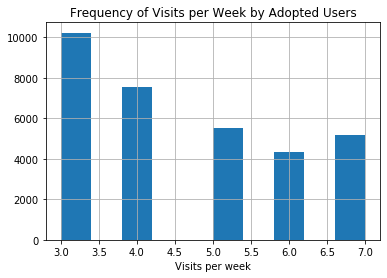

In [34]:
df2['frequency'].hist()
plt.title("Frequency of Visits per Week by Adopted Users")
plt.xlabel("Visits per week")
plt.show();

#### iii. Create 'Adopted_User' Column

In [35]:
df2.insert(4, 'adopted_user', 'Yes')
df2.head()

,a_year,a_month,a_week_of_year,user_id,adopted_user,frequency
39,2012,6,23,1693,Yes,3
96,2012,6,24,728,Yes,4
177,2012,6,24,11764,Yes,3
195,2012,6,25,1693,Yes,3
223,2012,6,25,5297,Yes,3


In [36]:
df2.tail()

,a_year,a_month,a_week_of_year,user_id,adopted_user,frequency
75917,2014,6,23,11573,Yes,3
75921,2014,6,23,11688,Yes,3
75925,2014,6,23,11806,Yes,3
75930,2014,6,23,11895,Yes,3
75932,2014,6,23,11924,Yes,3


#### iv. Include only unique users

I will drop every instance of user_id after its first appearance.

In [37]:
df2.shape

(32754, 6)

In [38]:
df2.user_id.nunique()

1416

In [39]:
df2 = df2.drop_duplicates(subset=['user_id'], keep='first')
df2.head()

,a_year,a_month,a_week_of_year,user_id,adopted_user,frequency
39,2012,6,23,1693,Yes,3
96,2012,6,24,728,Yes,4
177,2012,6,24,11764,Yes,3
223,2012,6,25,5297,Yes,3
318,2012,6,26,6171,Yes,3


In [40]:
df2.shape

(1416, 6)

So, out of the 32,754 visits by users, only 1416 are by unique users.

#### v. Explore year, week, and month variables

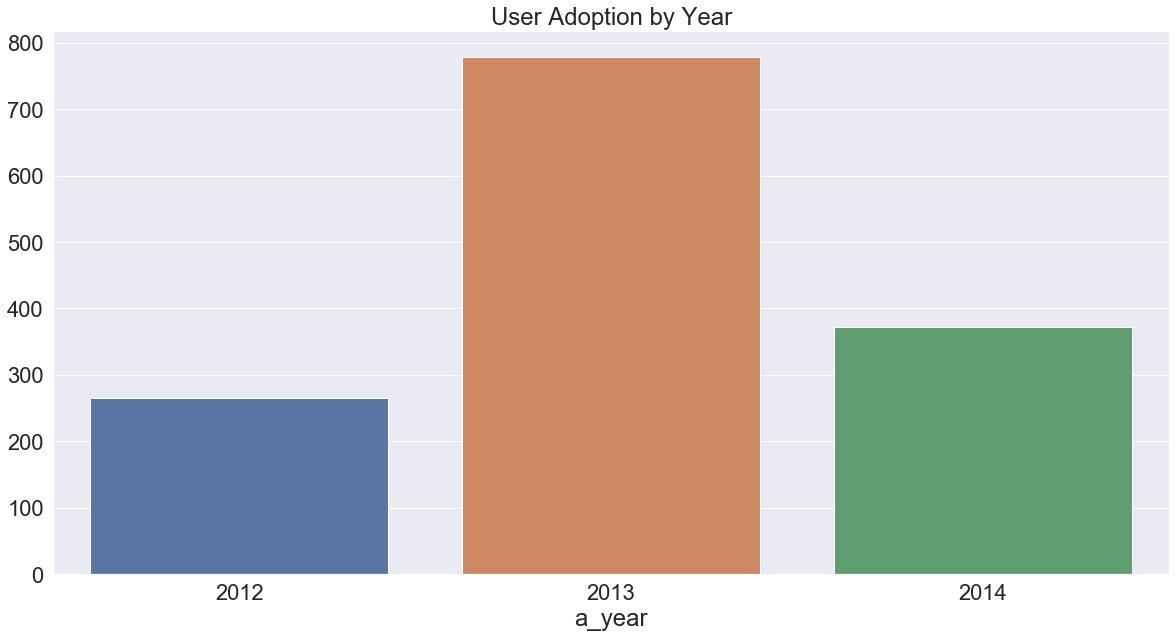

In [41]:
#Calculate Users by Year
adopted_by_year = df2.groupby("a_year")["user_id"].count()
#Plot Bar
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(adopted_by_year.index, adopted_by_year.values)
plt.title("User Adoption by Year");

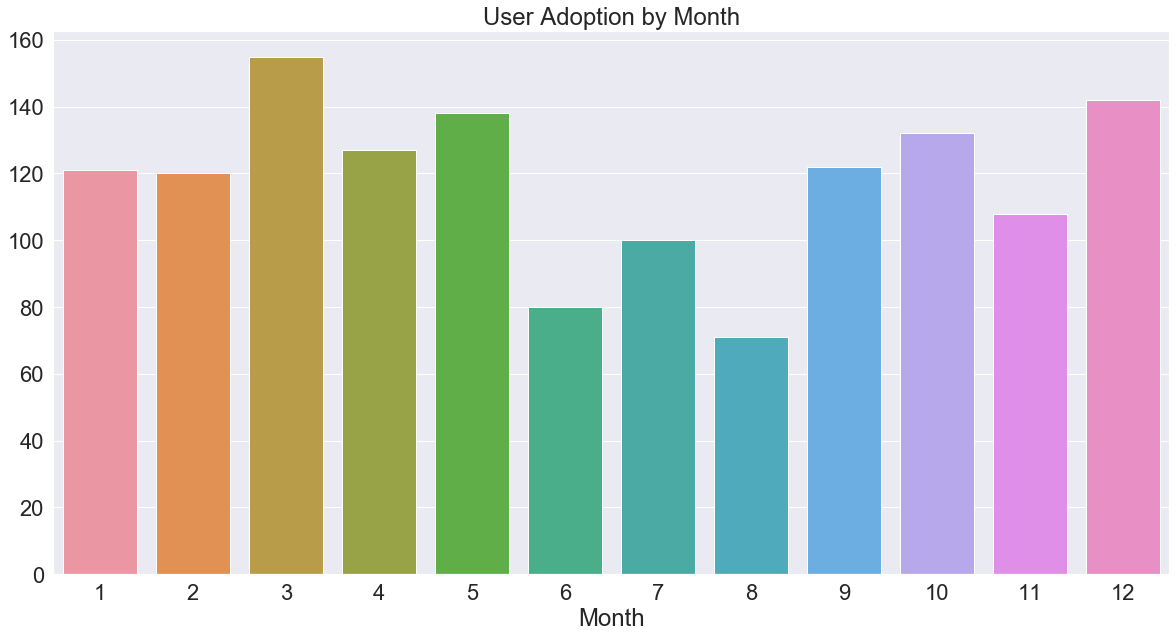

In [42]:
#Calculate Users by Month
adopted_by_month = df2.groupby("a_month")["user_id"].count()
#Plot Bar
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(adopted_by_month.index, adopted_by_month.values)
plt.savefig('adoption_by_month.png')
plt.xlabel('Month')
plt.title("User Adoption by Month");

> There appears to be a peak around March, falling through the summer, then rising up around the holidays.

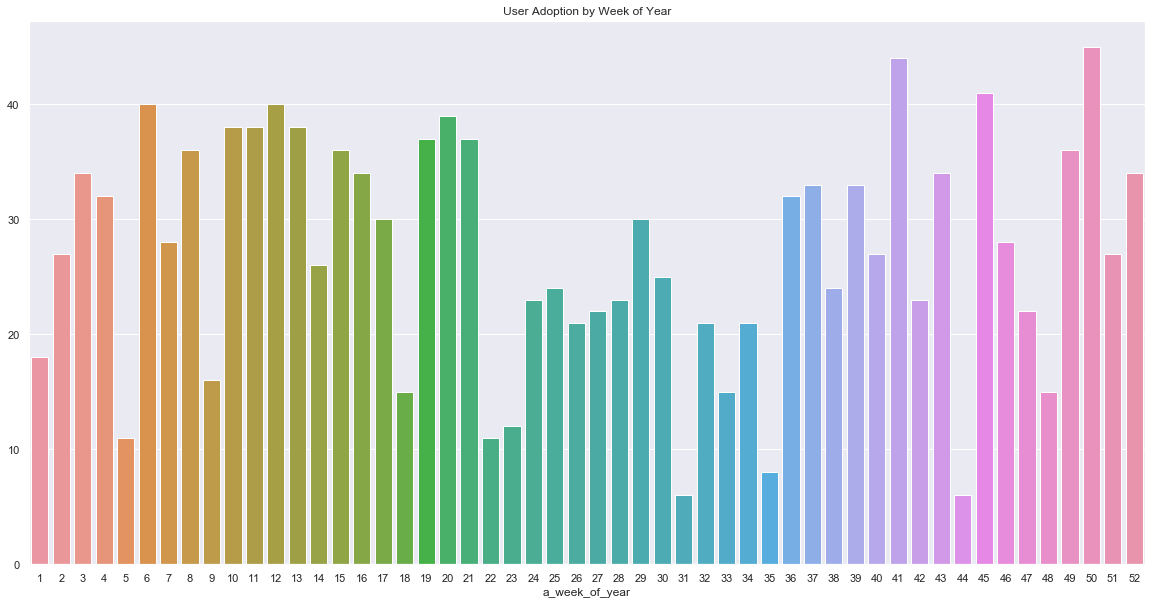

In [43]:
#Calculate Users by Week of Year
adopted_by_week = df2.groupby("a_week_of_year")["user_id"].count()
#Plot Bar
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.barplot(adopted_by_week.index, adopted_by_week.values)
plt.title("User Adoption by Week of Year");

> Here we can see the dips at week 31, and peaks around 41 and 50. Overall, user adoption appears to be less frequent during the summer.

### 3. Join the two dataframes

In [44]:
df2.head()

,a_year,a_month,a_week_of_year,user_id,adopted_user,frequency
39,2012,6,23,1693,Yes,3
96,2012,6,24,728,Yes,4
177,2012,6,24,11764,Yes,3
223,2012,6,25,5297,Yes,3
318,2012,6,26,6171,Yes,3


In [45]:
#Subset only the user_id and adopted_user columns
df3 = df2[['user_id', 'adopted_user']]

In [46]:
df3.shape

(1416, 2)

In [47]:
df.shape

(12000, 11)

In [48]:
df4 = df.set_index('user_id').join(df3.set_index('user_id'))
df4.head(2)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,never_visited,adopted_user
user_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,NaN
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,0,Yes


In [49]:
df4.isnull().sum()

creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id                0
never_visited                     0
adopted_user                  10584
dtype: int64

In [50]:
#Replacing 'Null' adopted_user with "No"
df4['adopted_user'].fillna("No", inplace=True)

In [51]:
df4.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,never_visited,adopted_user
user_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,No
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,0,Yes
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0,No
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0,No
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0,No
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241,0,No
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,Organic,0,No
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,2013-07-31 05:34:02,1,1,74,Organic,1,No
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,2013-11-05 04:04:24,0,0,302,Organic,1,No


I'm curious to see if the month, year, or week of sign-up has an effect on user adoption.

In [52]:
#create year Column
df4['year'] = df4['creation_time'].dt.year

#create year Column
df4['month'] = df4['creation_time'].dt.month

#Create Week Column
df4['week_of_year'] = df4['creation_time'].dt.week

#Visual Check
df4.head(2)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,never_visited,adopted_user,year,month,week_of_year
user_id,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,No,2014,4,17
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,0,Yes,2013,11,46


### 4. Exploratory Data Analysis

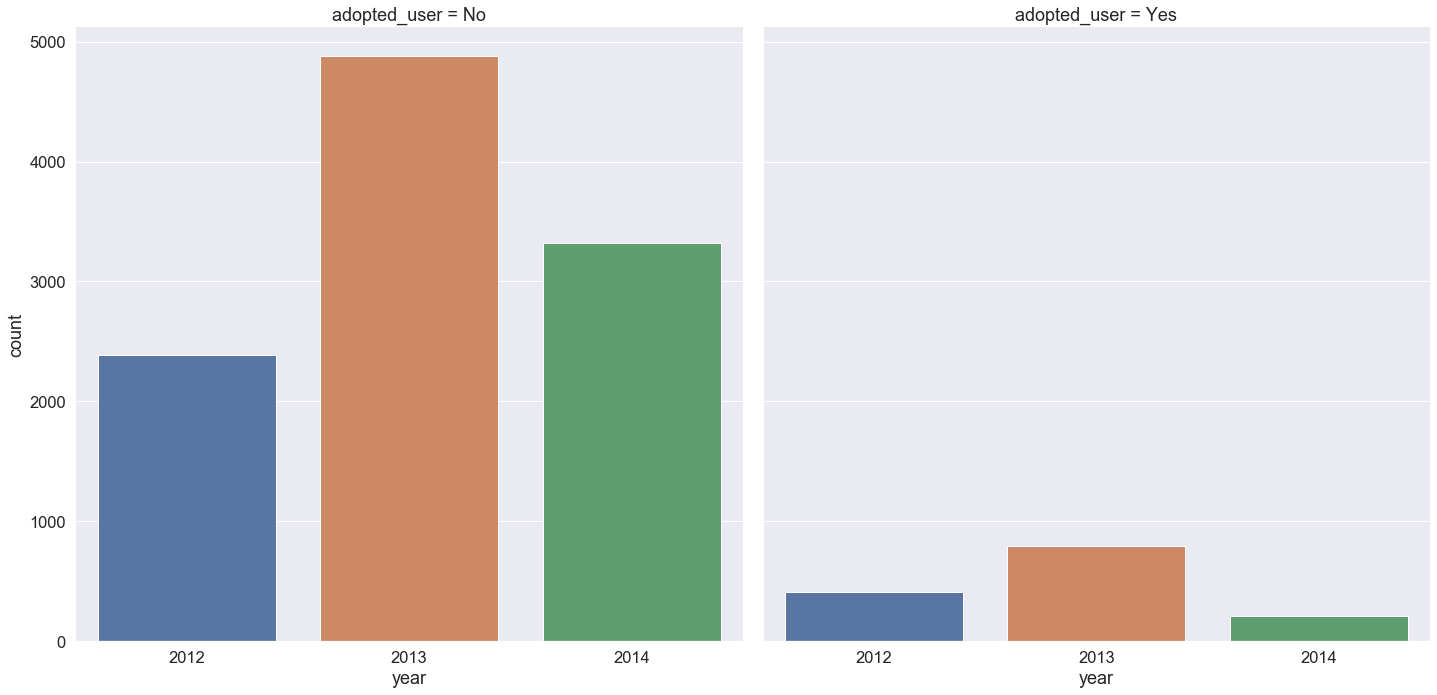

In [53]:
#Compare Year of Sign-Up
sns.set(font_scale=1.5)
g = sns.catplot(x="year", col="adopted_user", data=df4, kind="count", height=10)

We can see here that user adoption was highest in 2013, however, as our oldest datetime value was 2014-06-06, we know that this dataset ends halfway through 2014.

<Figure size 1440x720 with 0 Axes>

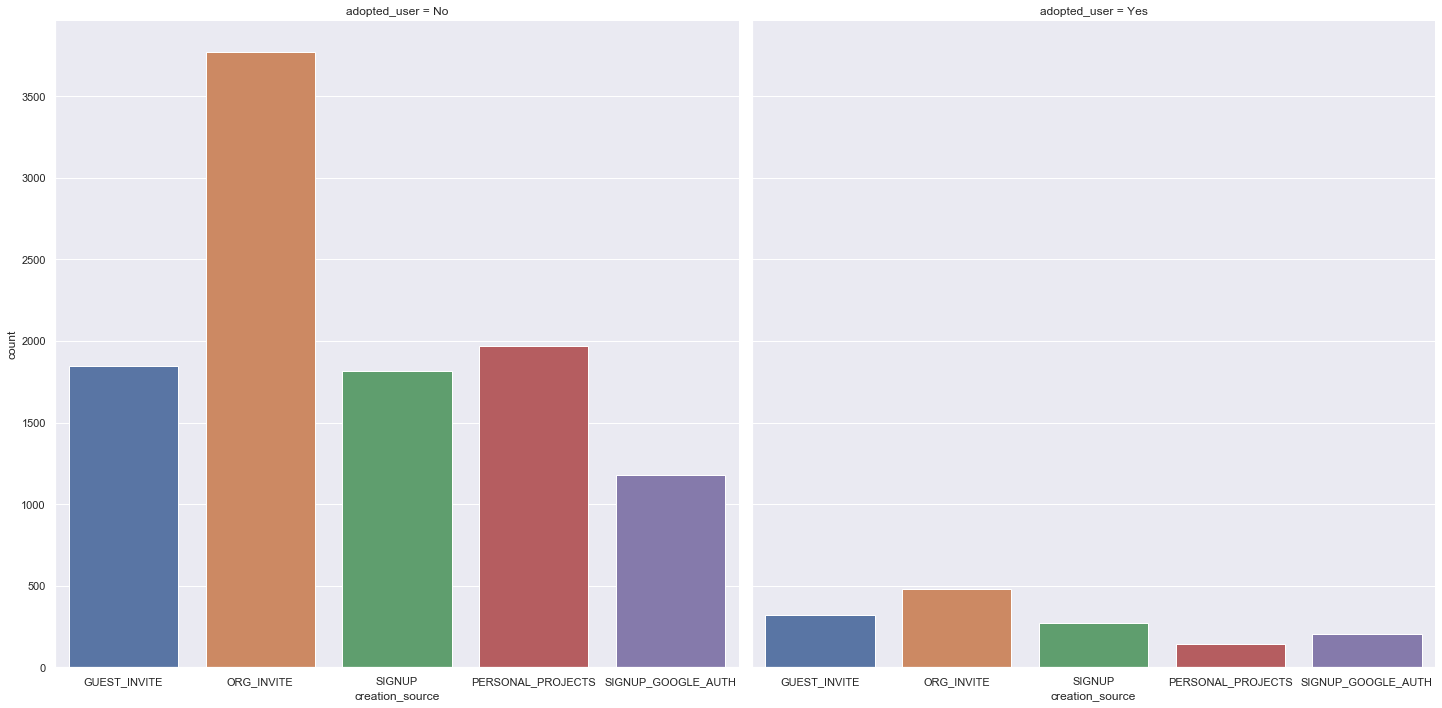

In [54]:
#Compare Creation Source for the two groups
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.catplot(x="creation_source", col="adopted_user", data=df4, kind="count", height=10)
plt.savefig('creation_source.png')
plt.show();

The type of referral looks roughly similar for the two groups.

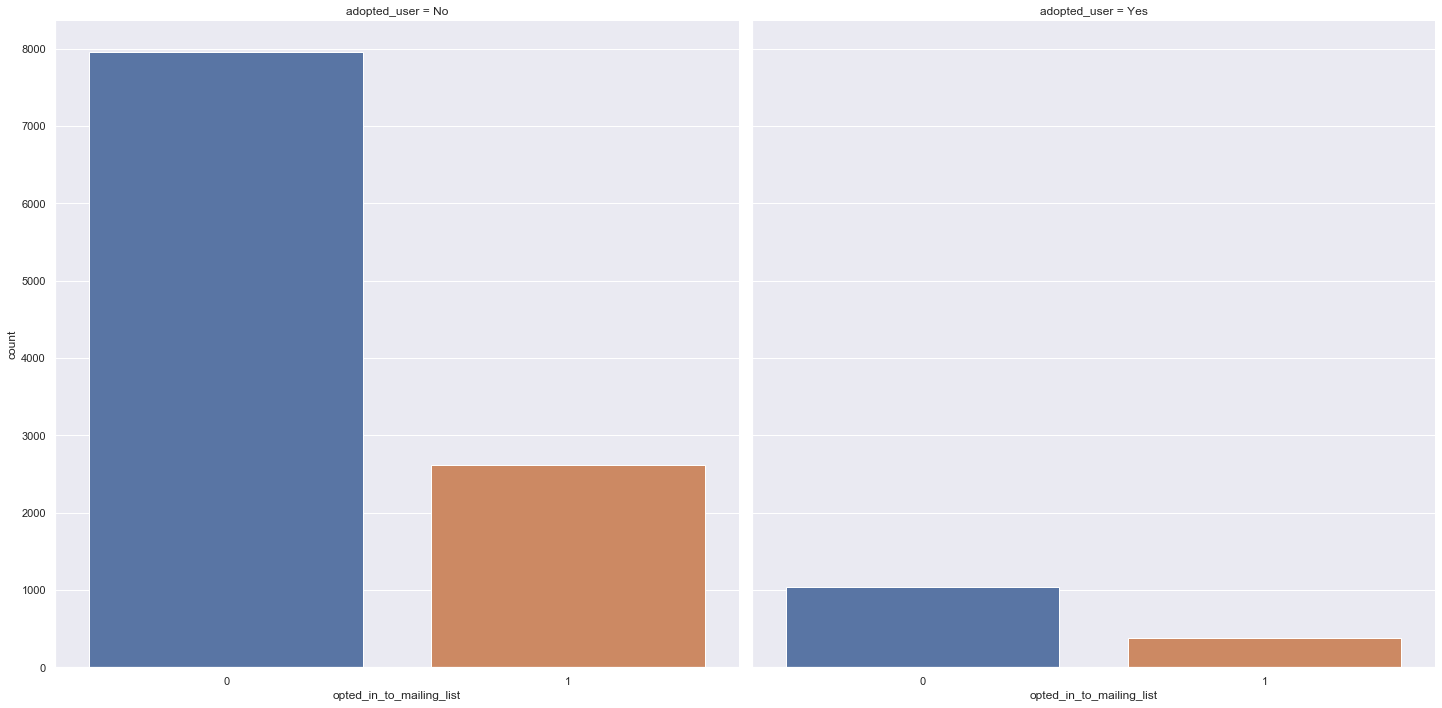

In [55]:
#Compare Newsletter Opt-In for the two groups
sns.set(font_scale=1)
g = sns.catplot(x="opted_in_to_mailing_list", col="adopted_user", data=df4, kind="count", height=10)

Adopted users are not all opted-in to the mailing list.

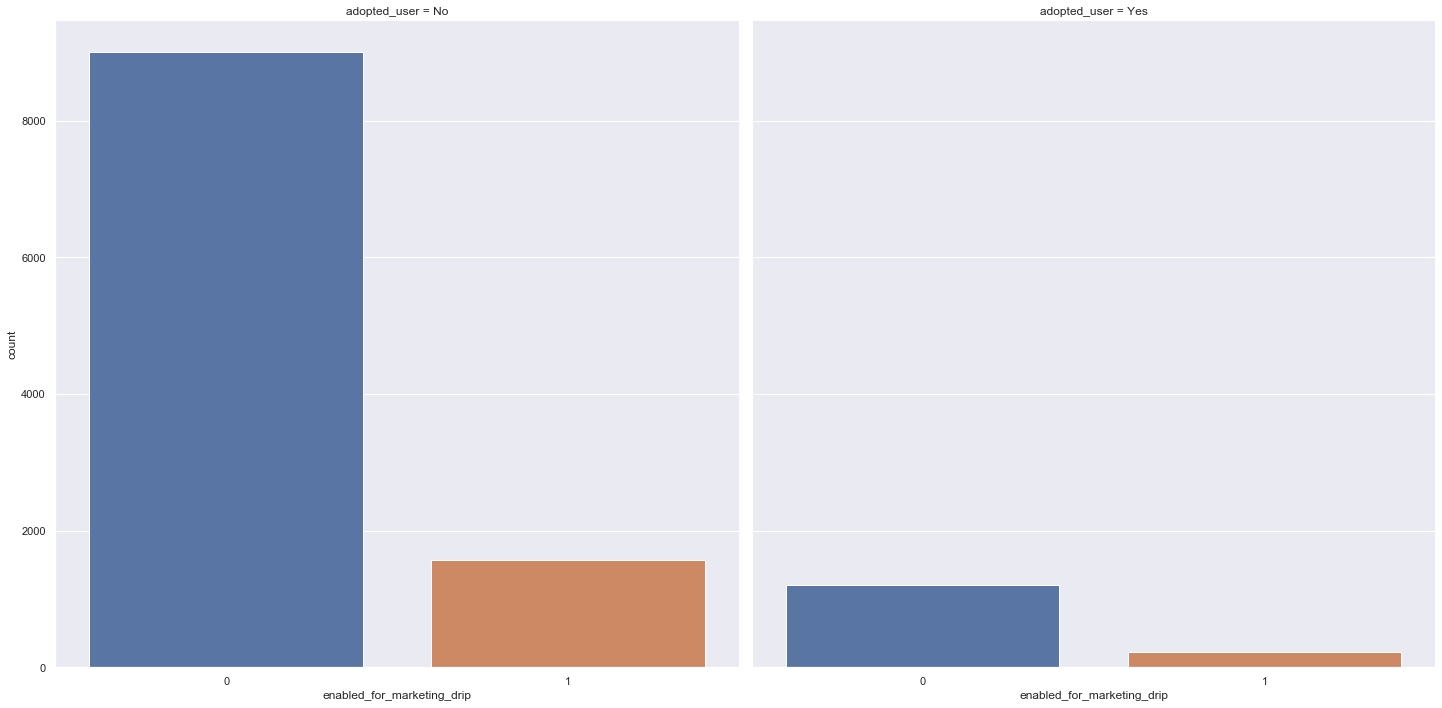

In [56]:
#Compare Marketing Drip for the two groups
sns.set(font_scale=1)
g = sns.catplot(x="enabled_for_marketing_drip", col="adopted_user", data=df4, kind="count", height=10)

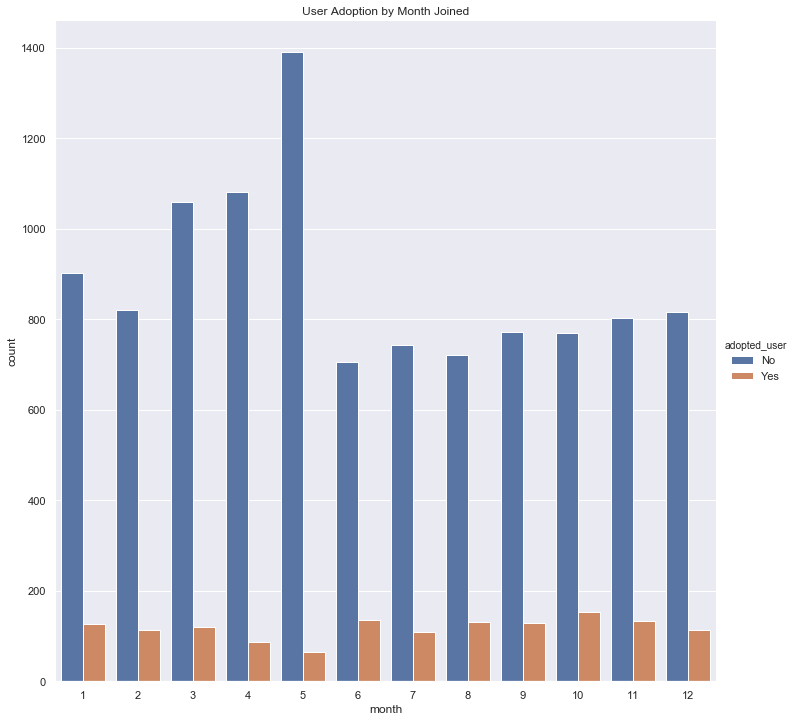

In [57]:
sns.catplot(data=df4,kind='count',x='month',hue='adopted_user', height=10)
plt.title("User Adoption by Month Joined")
plt.show();

This is interesting: while the most users were created in May, that was the lowest month for user adoption.

### 5. Pre-Processing

In [58]:
#Create Dummies for adopted_user
a_dummies = pd.get_dummies(df4.adopted_user)

In [59]:
#Create Dummies for creation_source
sr_dummies = pd.get_dummies(df4.creation_source, prefix="Creation_Source")

In [60]:
#Create Dummies for invited_by_user_id
ur_dummies = pd.get_dummies(df4.invited_by_user_id, prefix="Invited_By")

In [61]:
#Create Dummies for org_id
org_dummies = pd.get_dummies(df4.org_id, prefix="org_id" )

In [62]:
#Create Dummies for month
month_dummies = pd.get_dummies(df4.month, prefix="month" )

In [63]:
#Join Dummies
df5 = pd.concat([df4, a_dummies, sr_dummies, month_dummies], axis=1)

#Visual Check
df5.head(2)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,never_visited,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,...,0,1,0,0,0,0,0,0,0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
#Drop Categorical/Text Features
df6= df5.drop(['creation_time', 'No','name', 'email', 'creation_source', 'never_visited', 'last_session_creation_time', 'org_id', 'invited_by_user_id', 'adopted_user', 'month', 'week_of_year', 'year'], axis=1)

#Visual Check
df6.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,Yes,Creation_Source_GUEST_INVITE,Creation_Source_ORG_INVITE,Creation_Source_PERSONAL_PROJECTS,Creation_Source_SIGNUP,Creation_Source_SIGNUP_GOOGLE_AUTH,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
user_id,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [65]:
features = []

for column in df6.columns:
    if column != "Yes":
        features.append(column)
print(features)

['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'Creation_Source_GUEST_INVITE', 'Creation_Source_ORG_INVITE', 'Creation_Source_PERSONAL_PROJECTS', 'Creation_Source_SIGNUP', 'Creation_Source_SIGNUP_GOOGLE_AUTH', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']


In [66]:
y = df6['Yes']
X = df6.drop(columns=["Yes"])

In [67]:
#Split Features into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [68]:
clf = LogisticRegression(max_iter=1000)

# Fit the model on the training data.
clf.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# Print the accuracy from the testing data.
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [70]:
column_labels = X.columns.tolist()
coef = clf.coef_.squeeze().tolist()

# Zip together
labels_coef = list(zip(column_labels, coef))

#Create Dataframe
results = pd.DataFrame(labels_coef )

In [71]:
results = results.rename(columns={0: "Feature", 1: "Coefficient"})

In [72]:
results = results.sort_values(by=['Coefficient'], ascending=False).reset_index(drop=True)
results.head(20)

,Feature,Coefficient
0,month_6,0.455145
1,month_10,0.383940
2,Creation_Source_SIGNUP_GOOGLE_AUTH,0.276021
3,month_9,0.257196
4,Creation_Source_GUEST_INVITE,0.252738
5,month_11,0.234761
6,month_8,0.199998
7,Creation_Source_SIGNUP,0.146652
8,opted_in_to_mailing_list,0.069592
9,month_12,0.054245


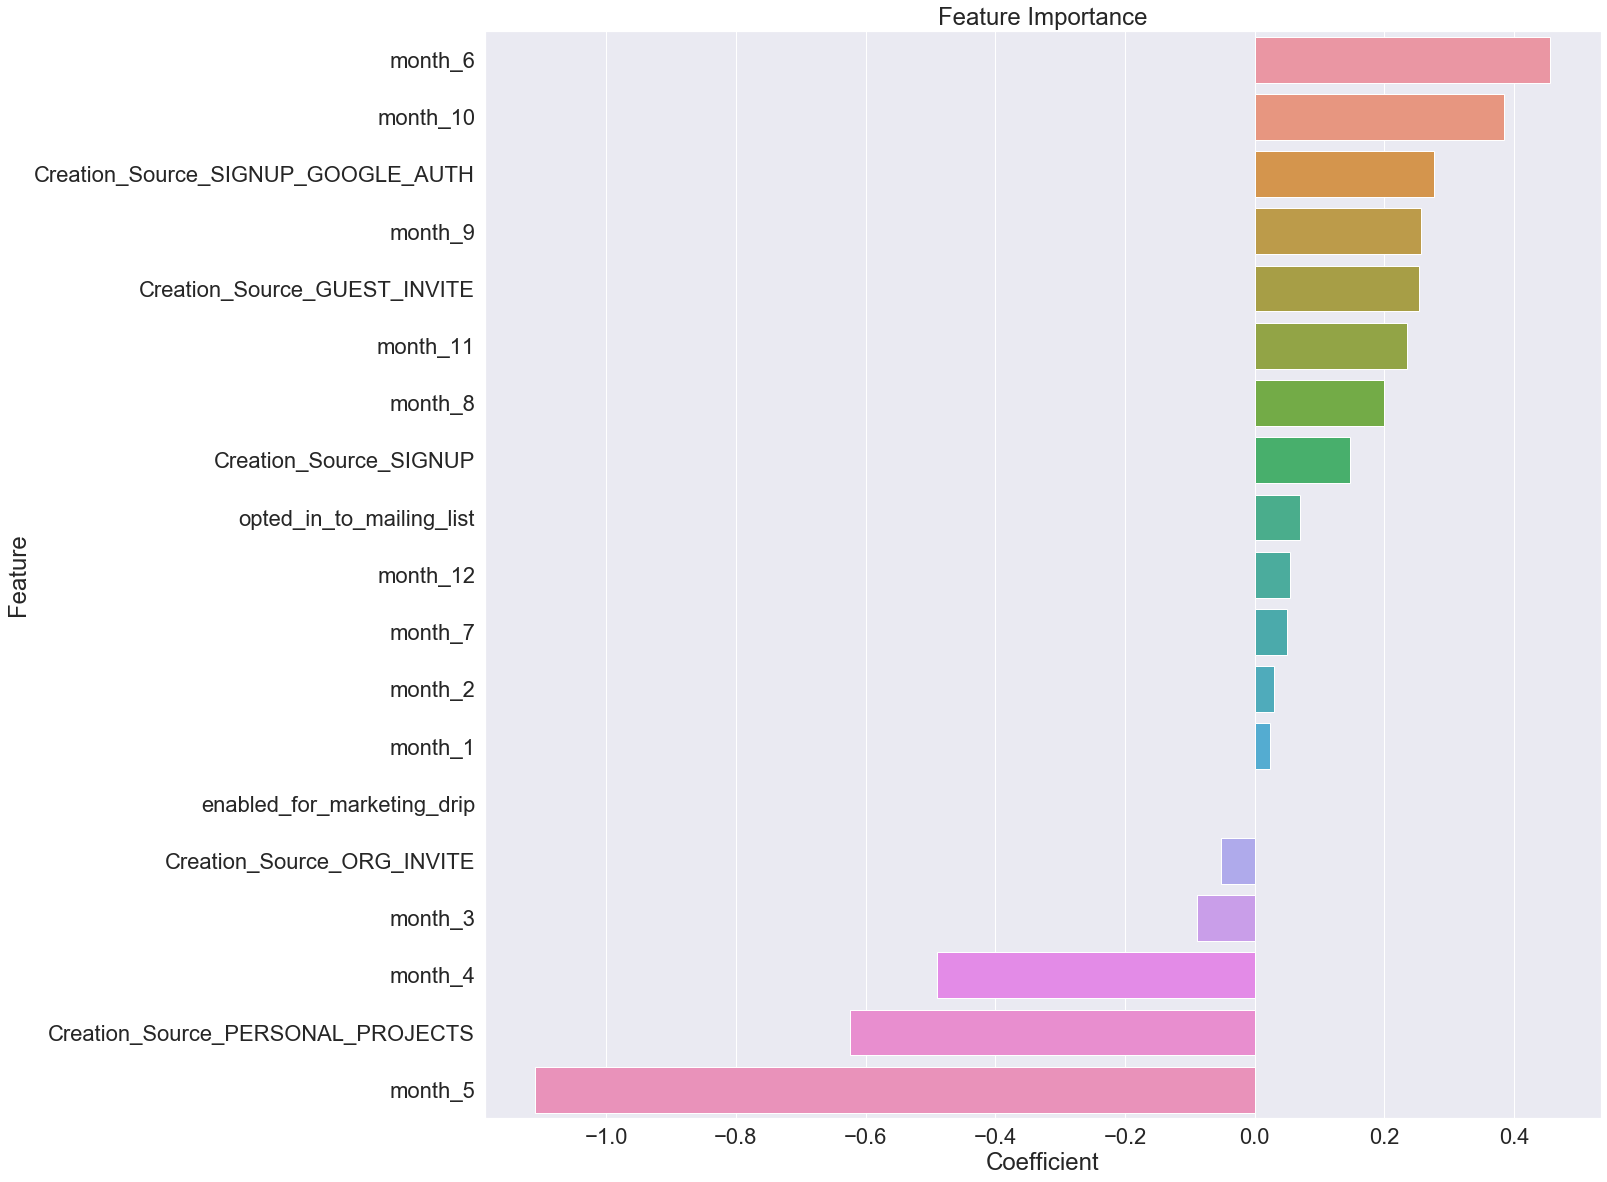

In [73]:
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
ax = sns.barplot(x="Coefficient", y="Feature", data=results)
plt.title("Feature Importance")
plt.savefig('feature_importance.png')
plt.show();